# Knn Regression

1. Choose K (the number of clusters you want).

2. Initialize K centroids randomly.

3. Repeat until convergence:
   a. Assign each data point to the nearest centroid.
   b. Recalculate the centroids based on the current assignment of data points.
   
4. Return the final K centroids and the corresponding cluster assignments.


In [50]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [51]:
df = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
# df.head(5)

In [52]:
# Spliting the dataset
df = df[df['DEP_DELAY'] > 0]
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
9,11,1,5,184,1069,370,554,46,32,58,...,False,False,False,False,False,False,False,False,False,False
14,11,1,5,222,1598,301,523,46,32,58,...,False,False,False,False,False,False,False,False,False,False
26,11,1,5,184,1089,420,604,47,33,59,...,False,False,False,False,False,False,False,False,False,False
30,11,1,5,75,266,455,530,47,33,59,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28811,1,31,5,406,2586,1273,59,40,38,93,...,False,False,False,False,False,False,False,False,False,False
28815,1,31,5,57,150,1370,1427,39,38,96,...,False,False,False,False,False,False,False,False,False,False
28816,1,31,5,75,187,1390,25,39,38,96,...,False,False,False,False,False,False,False,False,False,False
28817,1,31,5,392,2422,1125,1337,39,38,96,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df = df.astype(int)
# df.head(5)

6.747267428396521


/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


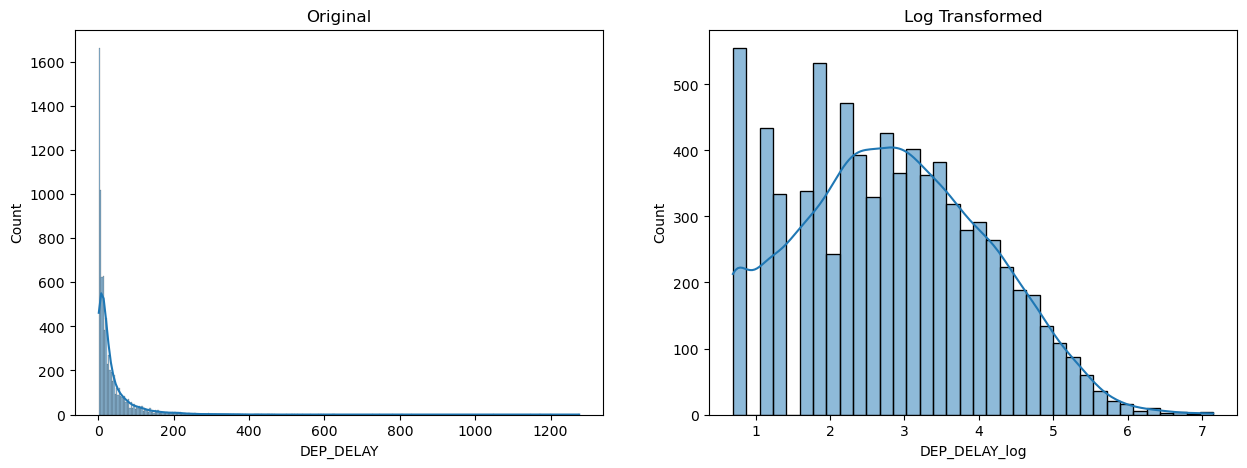

In [54]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY'])  # log1p avoids log(0) issue
# df['DEP_DELAY_sqrt'] = np.sqrt(df['DEP_DELAY']) # sqrt version

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])

import matplotlib.pyplot as plt
import seaborn as sns

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['DEP_DELAY'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(df['DEP_DELAY_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

# sns.histplot(df['DEP_DELAY_sqrt'], kde=True, ax=axes[2])
# axes[2].set_title('Square Root Transformed')

plt.show()

In [55]:
df['CRS_DEP_M_log'] = np.log1p(df['CRS_DEP_M'])  # log1p avoids log(0) issue
df['Wind_Speed_log'] = np.log1p(df['Wind Speed'])  # log1p avoids log(0) issue
df['MONTH_log'] = np.log1p(df['MONTH'])  # log1p avoids log(0) issue

df['CRS_ARR_M_log'] = np.log1p(df['CRS_ARR_M'])  # log1p avoids log(0) issue
df['DAY_OF_MONTH_log'] = np.log1p(df['DAY_OF_MONTH'])  # log1p avoids log(0) issue
df['Wind_Gust_log'] = np.log1p(df['Wind Gust'])  # log1p avoids log(0) issue

df['Pressure_log'] = np.log1p(df['Pressure'])  # log1p avoids log(0) issue
df['Condition_Light Snow / Windy_log'] = np.log1p(df['Condition_Light Snow / Windy'])  # log1p avoids log(0) issue
df['Condition_Rain_log'] = np.log1p(df['Condition_Rain'])  # log1p avoids log(0) issue

df['OP_UNIQUE_CARRIER_MQ_log'] = np.log1p(df['OP_UNIQUE_CARRIER_MQ'])  # log1p avoids log(0) issue
df['DEST_LAX_log'] = np.log1p(df['DEST_LAX'])  # log1p avoids log(0) issue
df['Temperature_log'] = np.log1p(df['Temperature'])  # log1p avoids log(0) issue

df['Condition_Mostly_Cloudy_log'] = np.log1p(df['Condition_Mostly Cloudy'])  # log1p avoids log(0) issue
df['Condition_Heavy_Rain_log'] = np.log1p(df['Condition_Heavy Rain'])  # log1p avoids log(0) issue
# df['Condition_Partly Cloudy / Windy_log'] = np.log1p(df['Condition_Partly Cloudy / Windy'])  # log1p avoids log(0) issue


In [56]:
X = df.drop(columns=['DEP_DELAY_log','DEP_DELAY','DEP_DELAY_shifted', 'CRS_DEP_M','Wind Speed','MONTH','CRS_ARR_M', 'DAY_OF_MONTH','Wind Gust', 'Pressure','Condition_Light Snow / Windy', 'Condition_Rain', 'OP_UNIQUE_CARRIER_MQ', 'DEST_LAX', 'Temperature', 'Condition_Mostly Cloudy', 'Condition_Heavy Rain'])  # Feature matrix
y = df['DEP_DELAY_log']  # Target variable

y.head(5)

2     3.713572
9     1.386294
14    4.691348
26    1.609438
30    1.945910
Name: DEP_DELAY_log, dtype: float64

In [57]:
# X = df.drop(columns=['DEP_DELAY_sqrt'])  # Feature matrix
# y = df['DEP_DELAY_sqrt']  # Target variable

# y.head(5)

In [58]:
# X = df.drop(columns=['DEP_DELAY'])  # Feature matrix
# y = df['DEP_DELAY']  # Target variable

# y.head(5)


### Feature Selection

In [59]:
X = X.applymap(lambda x: max(x, 0))
X = X.fillna(X.mean())

/var/folders/06/6rnd9mvj2tg64m2vg9cssn0w0000gn/T/ipykernel_15018/3256436071.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: max(x, 0))


In [60]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with f_regression
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame with feature names and scores
feature_df = pd.DataFrame({'Feature': selected_features, 'F-Score': feature_scores})
feature_df = feature_df.sort_values(by='F-Score', ascending=False)

# Print the selected features
print("Selected Features:")
print(feature_df)
# print(feature_df['Feature'])


Selected Features:
                     Feature     F-Score
2                    sch_dep  229.023585
1                   DISTANCE  124.142358
0           CRS_ELAPSED_TIME  123.589042
4       OP_UNIQUE_CARRIER_DL  107.601478
12              Pressure_log   68.823011
10            Wind_Speed_log   63.063530
9              CRS_DEP_M_log   62.527393
13  OP_UNIQUE_CARRIER_MQ_log   45.086968
3       OP_UNIQUE_CARRIER_B6   37.592552
8   Condition_Cloudy / Windy   35.120253
7                   DEST_BWI   26.609369
6                   DEST_BUF   24.263974
5                   DEST_BTV   23.327382
11             CRS_ARR_M_log   21.317730
14              DEST_LAX_log   18.651289


In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [62]:
X_train

,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,Dew Point,Humidity,sch_dep,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,...,DAY_OF_MONTH_log,Wind_Gust_log,Pressure_log,Condition_Light Snow / Windy_log,Condition_Rain_log,OP_UNIQUE_CARRIER_MQ_log,DEST_LAX_log,Temperature_log,Condition_Mostly_Cloudy_log,Condition_Heavy_Rain_log
4535,4,183,1028,31,62,31,0,0,1,0,...,2.708050,0.0,3.433987,0.0,0.000000,0.0,0.000000,3.784190,0.693147,0.0
16045,7,91,187,32,67,35,0,0,0,0,...,3.135494,0.0,3.433987,0.0,0.000000,0.0,0.000000,3.761200,0.000000,0.0
18358,7,200,1069,40,10,42,0,0,0,1,...,3.401197,0.0,3.433987,0.0,0.693147,0.0,0.000000,3.713572,0.000000,0.0
21188,3,75,266,29,85,40,0,0,1,0,...,2.197225,0.0,3.401197,0.0,0.000000,0.0,0.000000,3.526361,0.693147,0.0
15126,4,169,765,9,53,40,0,0,0,0,...,2.995732,0.0,3.433987,0.0,0.000000,0.0,0.000000,3.218876,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17936,6,197,1069,34,56,35,0,0,1,0,...,3.367296,0.0,3.433987,0.0,0.000000,0.0,0.000000,3.912023,0.693147,0.0
18485,1,162,828,42,10,51,0,0,0,1,...,3.433987,0.0,3.401197,0.0,0.000000,0.0,0.000000,3.761200,0.000000,0.0
3530,1,191,1074,55,97,31,0,0,1,0,...,2.484907,0.0,3.401197,0.0,0.000000,0.0,0.000000,4.043051,0.693147,0.0
27362,1,394,2475,29,55,29,0,0,0,1,...,3.332205,0.0,3.401197,0.0,0.000000,0.0,0.693147,3.806662,0.693147,0.0


In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# # Reshape X_train to be a 2D array
# X_train = X_train.reshape(-1, 1)  
# X_test = X_test.reshape(-1, 1)

# Apply StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
# weights='distance'
regressor = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [66]:
y_pred_log = regressor.predict(X_test)

# y_pred = np.exp(y_pred_log)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 698.02
Mean Absolute Error (MAE): 21.82


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 21, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best k:", grid.best_params_)

Best k: {'n_neighbors': 3}


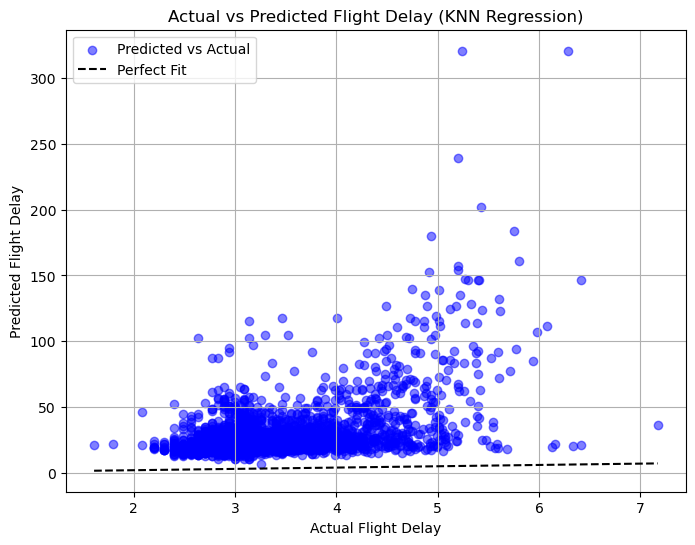

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Flight Delay")
plt.ylabel("Predicted Flight Delay")
plt.title("Actual vs Predicted Flight Delay (KNN Regression)")
plt.legend()
plt.grid(True)
plt.show()